In [8]:
import sys
import os
import joblib


In [9]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [10]:
from src.train_model import train_and_save
from src.evaluate import evaluate_model
from src.preprocess import load_data


In [11]:
# Load data (prints resolved path for confirmation)
from src.preprocess import load_data

X_train, X_test, y_train, y_test = load_data()
print(X_train.head())
print(y_train.head())


Loading data from: /workspaces/UTI-risk-prediction/data/uti_real_data.csv
     Temperature of patient  Occurrence of nausea  Lumbar pain  \
110                    41.2                     1            1   
50                     37.7                     0            1   
93                     40.7                     1            1   
12                     36.6                     0            1   
26                     37.0                     0            0   

     Urine pushing (continuous need for urination)  Micturition pains  \
110                                              1                  1   
50                                               0                  0   
93                                               1                  1   
12                                               0                  0   
26                                               1                  1   

     Burning of urethra, itch, swelling of urethra outlet  \
110                          

In [12]:
print(X_train.dtypes)
print(X_train.head())


Temperature of patient                                  float64
Occurrence of nausea                                      int64
Lumbar pain                                               int64
Urine pushing (continuous need for urination)             int64
Micturition pains                                         int64
Burning of urethra, itch, swelling of urethra outlet      int64
Nephritis of renal pelvis origin                         object
symptom_score                                             int64
dtype: object
     Temperature of patient  Occurrence of nausea  Lumbar pain  \
110                    41.2                     1            1   
50                     37.7                     0            1   
93                     40.7                     1            1   
12                     36.6                     0            1   
26                     37.0                     0            0   

     Urine pushing (continuous need for urination)  Micturition pains  \
110 

In [13]:
X_train = X_train.drop(columns=["Nephritis of renal pelvis origin"])
X_test = X_test.drop(columns=["Nephritis of renal pelvis origin"])


In [14]:
print(X_train.dtypes)


Temperature of patient                                  float64
Occurrence of nausea                                      int64
Lumbar pain                                               int64
Urine pushing (continuous need for urination)             int64
Micturition pains                                         int64
Burning of urethra, itch, swelling of urethra outlet      int64
symptom_score                                             int64
dtype: object


In [15]:
train_and_save(X_train, y_train)


Model trained and saved to model/uti_model.pkl


In [17]:
model = joblib.load("model/uti_model.pkl")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

ROC AUC: 1.0


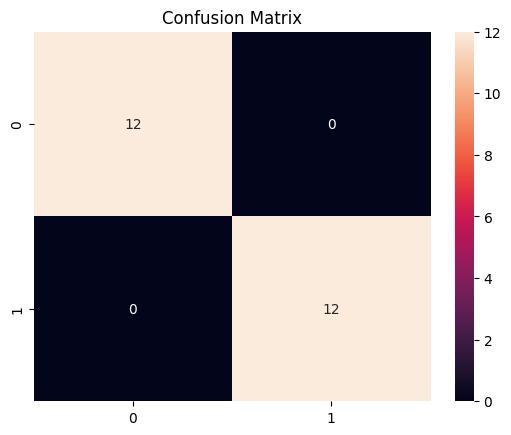

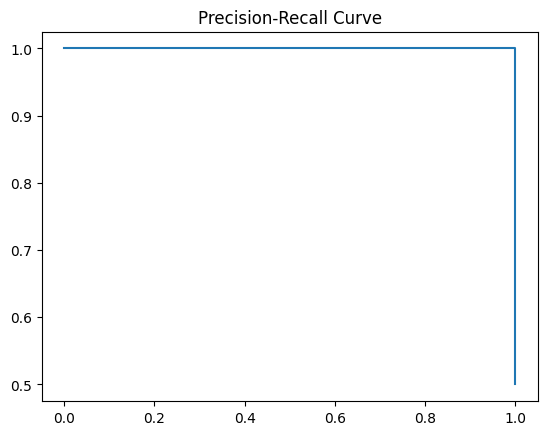

In [18]:
evaluate_model(model, X_test, y_test)

In [19]:
joblib.dump(model, "../uti_model.pkl")

['../uti_model.pkl']